In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


C:\Users\ChissanuPC\AppData\Local\Temp\ipykernel_19580\2035432502.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("anime_clean.csv", encoding="utf8")
data.head()

,anime_id,anime_url,title,synopsis,main_pic,type,source_type,num_episodes,status,start_date,...,score_08_count,score_07_count,score_06_count,score_05_count,score_04_count,score_03_count,score_02_count,score_01_count,clubs,pics
0,2366,https://myanimelist.net/anime/2366/Touma_Kishi...,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4940,https://myanimelist.net/anime/4940/Sabaku_no_K...,Sabaku no Kaizoku! Captain Kuppa,Sometime in the future,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50285,https://myanimelist.net/anime/50285/On_Air_Dek...,On Air Dekinai!,Set in 2014,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3975,https://myanimelist.net/anime/3975/Uchi_no_3_S...,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36036,https://myanimelist.net/anime/36036/Running_Man,Running Man,The Soul Tree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean Data

In [3]:
data = data.dropna(subset=['genres'])
data = data.dropna(subset=['source_type'])
data = data.dropna(subset=['studios'])
data = data.dropna(subset=['score'])
data.isnull().sum()


anime_id                  0
anime_url                 0
title                     0
synopsis                  1
main_pic                  0
type                      0
source_type               0
num_episodes             21
status                    0
start_date                0
end_date                 27
season                 1721
studios                   0
genres                    0
score                     0
score_count               0
score_rank              309
popularity_rank           0
members_count             0
favorites_count           0
watching_count            0
completed_count           0
on_hold_count             0
dropped_count             0
plan_to_watch_count       0
total_count               0
score_10_count            0
score_09_count            0
score_08_count            0
score_07_count            0
score_06_count            0
score_05_count            0
score_04_count            0
score_03_count            0
score_02_count            0
score_01_count      

In [4]:
data.head()

,anime_id,anime_url,title,synopsis,main_pic,type,source_type,num_episodes,status,start_date,...,score_08_count,score_07_count,score_06_count,score_05_count,score_04_count,score_03_count,score_02_count,score_01_count,clubs,pics
696,39572,https://myanimelist.net/anime/39572/Wangu_Xian...,Wangu Xian Qiong III: Eren Gu Pian,Third season of .,https://cdn.myanimelist.net/images/anime/1873/...,TV,Novel,13.0,Finished Airing,3/8/2019 0:00,...,25.0,53.0,28.0,11.0,6.0,5.0,4.0,1.0,42215|78730,https://cdn.myanimelist.net/images/anime/1873/...
732,4504,https://myanimelist.net/anime/4504/Kinkyuu_Has...,Kinkyuu Hasshin Saver Kids,Matsugorou is a vile doctor who plots out a pl...,https://cdn.myanimelist.net/images/anime/10/88...,TV,Original,50.0,Finished Airing,2/19/1991 0:00,...,20.0,46.0,32.0,26.0,12.0,4.0,1.0,4.0,7373|5441|19782,https://cdn.myanimelist.net/images/anime/4/861...
739,3114,https://myanimelist.net/anime/3114/Chiisana_Ky...,Chiisana Kyojin Microman,3 kids meet 5 micro-sized superheroes from ano...,https://cdn.myanimelist.net/images/anime/1058/...,TV,Other,52.0,Finished Airing,1/4/1999 0:00,...,12.0,48.0,36.0,27.0,12.0,6.0,7.0,4.0,7373|17397|11712|70786,https://cdn.myanimelist.net/images/anime/4/474...
740,2741,https://myanimelist.net/anime/2741/Monkey_Turn_V,Monkey Turn V,Sequel to .,https://cdn.myanimelist.net/images/anime/4/752...,TV,Manga,25.0,Finished Airing,7/4/2004 0:00,...,25.0,32.0,29.0,13.0,8.0,5.0,3.0,4.0,149|33601,https://cdn.myanimelist.net/images/anime/4/752...
742,44273,https://myanimelist.net/anime/44273/Mewkledrea...,Mewkledreamy Mix!,Second season of .,https://cdn.myanimelist.net/images/anime/1313/...,TV,Other,50.0,Currently Airing,4/11/2021 0:00,...,24.0,35.0,17.0,16.0,5.0,3.0,1.0,4.0,27907,https://cdn.myanimelist.net/images/anime/1610/...


In [5]:


df = data[['score','genres','source_type','studios']].copy()

df['genres'] = df['genres'].str.replace('|',', ')
df['genres'] = df['genres'].str.split(', ')
df = df.explode('genres')

df = pd.get_dummies(df, columns=["genres", "source_type", "studios"])

df.head()


,score,genres_Action,genres_Adventure,genres_Avant Garde,genres_Boys Love,genres_Cars,genres_Comedy,genres_Demons,genres_Drama,genres_Ecchi,...,studios_asread.,studios_asread.|White Fox,studios_domerica,studios_drop,studios_dwarf,studios_feel.,studios_feel.|Assez Finaud Fabric,studios_feel.|Zexcs|Assez Finaud Fabric,studios_iDRAGONS Creative Studio,studios_ufotable
696,6.84,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
696,6.84,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
696,6.84,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
732,6.40,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
732,6.40,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)


KMeans(n_clusters=3)

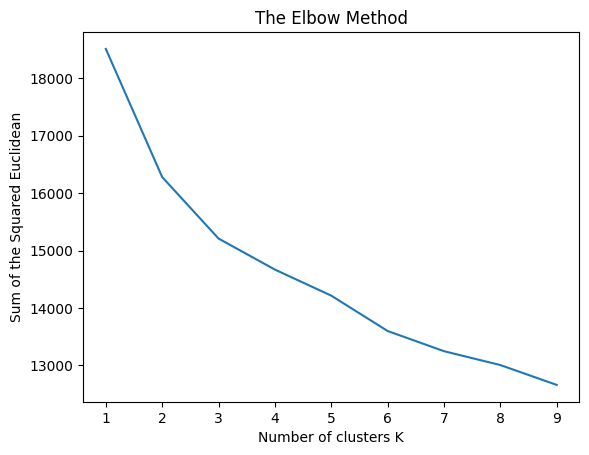

In [7]:
k_meansclus = range(1,10)
sse = []

for k in k_meansclus:
  km = KMeans(n_clusters =k)
  km.fit(df)
  sse.append(km.inertia_)

plt.title('The Elbow Method')
plt.plot(k_meansclus,sse)
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of the Squared Euclidean')
plt.show()

In [8]:
model = KMeans(n_clusters=3)
model.fit(df)
y_cluster = model.predict(df)
y_cluster

array([0, 0, 0, ..., 0, 0, 0])